# Detecting Pneumonia in Pediatric X-Rays by Utilization of Convolutional Neural Networks

Shaw J, Williams B, Wang M

## Introduction

### General Overview
Pneumonia is a medical condition characterized by inflammation of the lungs, a fairly common condition that can pose a significant health risk to sufferers.  There are many diagnostic techniques used to try to identify cases of pneumonia, with varying efficacies.  A common diagnostic procedure for identification of pneumonia is x-ray radiography, which is known to be less effective than some other procedures, such as CT scans, but has advantages in terms of being relatively cheap (with consideration of existing medical resources), quick, and simple[(1)](https://pneumonia.biomedcentral.com/articles/10.15172/pneu.2014.5/482). X-ray readings by even trained technicians are not a purely clear-cut, objective operation that can be simply algorithmized, indeed two technicians will often disagree on what is indicated by the same radiologial results [(2)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC60656/pdf/1471-2342-1-1.pdf).  Nevertheless, x-rays (and other, similarly quick-but-not-without-flaws methods) are attractive for use in routine diagnosis of pneumonia, with more powerful confirmation tests then being done if a confluence of diagnostic indication, patient details, etc. would prompt a trained medical expert to believe such further diagnostics would be called for.  

In this project, then, we seek to create a system to automate the role of at least one x-ray technician with respect to diagnosis of pneumonia from lung images.  This project is owes a strong debt in overall direction to the work of Garin, Marti, Caballo, et al [(3)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6518125/pdf/jcm-08-00514.pdf), who perform a similar task with logistic regression on quantifiable medical tests and patient biographic details.  Chest x-ray diagnosis for semi-routine cases of pneumonia seems like an appealing prospect for the use of imperfect AI systems as pneumonia, despite being a sometimes quite serious condition, is often one where one does not seek a strong confirmatory diagnosis and pragmatic concerns about difficulty & cost very mcuh weigh into such decisions[(1)](https://pneumonia.biomedcentral.com/articles/10.15172/pneu.2014.5/482). 

The authors are aware of similar work that has been done with this data in both an educational and professional capacity, however as this project is to a large part motivated by pedagogical concerns such work was not referenced or consulted.  For this same pedagogically motivated reason transfer learning was not used, however it should be noted that such an action would likely have been wise. 

### Description of Data & Data Limitations
Our data was made available through a [kaggle dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia), and consists of 5883 x-ray images taken of children (ages 1-5) from a medical facility in Guangzhou, China.  Also provided are labels for said image, created by a team of doctors. The data has some limitations that should be noted here:
- It is unclear, without significant further research, the extent to which any model found here will extend beyond the demographic scope of the original data set.
- The "true" labeling itself is provided by fallible human judgement; in addition to some mislabelling possibly have occuring one should be cautious of systemic biases in misidentification by humans being further picked up by any model created from that data.  This idea is expanded on towards the end of this document.

Further discussion of the data can be found in the kaggle dataset's page, linked here, along with [the associated paper given in the context section of that page](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5). 

### The Model in Detail

A convolutional neural network was selected for this project, as such networks are known to have good results with image classification tasks.  Non-neural network approaches were not investigated.  As the dataset is composed of actual x-ray images *intended for human use*, there is very little exploitable underlying data to attempt to engineer features from.  This, along with the known variation in image details (small changes in alignment, etc) put this problem squarely in the arena of what neural networks are well celebrated for their unparalleled performance in. 

A familiar "vanilla" system was used initially, further improvements were found through iterative modifications and included basic changes to the layer numbers, parameters, and types. The major change, expected but not initially used, was the introduction of dropout layers.  Model training was performed on the quite modest local machines of the authors, among all other obvious limitations a major one this brings about is the possibility of overfitting due to the all-too-finite batch size of the image data itself (distinct from the batch size of the fitting process), dropout layers helped to mitigate this.  

### Goal & Criteria for Model Selection

Ultimately this project seeks to supplement an existing human activity, and as such the exact use case need not be overly specific-- a full understanding of the logistical and policy impact of a given decision with respect to employment of such a tool is itself a major undertaking, especially if done in a predictive fashion rather than as an attempt to describe phenomena that has already occurred.  The most basic and conservative use of such a system we see is to simply serve as "another pair of eyes", acting as a second-or-third opinion for the interpretation of a given x-ray.  While one would be quite unlikely to trust a machine over a human expert; having an independently obtained human expert disagree with an automatic assessment could be a useful signal to conduct further review that may otherwise be reasonably considered to be appopriate in the event that the two assessments concur.   Our primary envisioned use, however-- the use that we build our model selection around-- is to serve as an initial screening test, in much the same way as x-rays paired with techs are used now, or other fallible-but-feasible methods.  In this basic, though ambitious, application patient x-rays would first be routed through such a system and the, if the machine were confident enough in a diagnosis, that diagnosis would be followed at least provisionally, in much the same way as traditional x-rays are used.  The nuances of this approach are discussed towards the end of this document. 

The necessary implications of this now, however, are that we wish to use not just the class labels of our model, but also the actual predicted probabilities given by our output layer. There is not a clear best metric to use for an envisioned use as we have here, as part of a preliminary screening whose use is informed by wider medical concerns and judged by the patient's doctor; indeed similar works will often report a wide array of metrics [(3)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6518125/) as a result.  A *familiar* implementation of such a diagnostic system would involve attempting to catch those with pneumonia automatically, under the reasonable assumption that a doctor wishing to order such a scan without requiring it to be of high fidelity (the scenario under which we envision our model being employed) is likely seeking to confirm already suspected pneumonia.  We thus chose as a methodological assumption that **the metric of interest would be the recall of the classification**, so that we would reward successful identification of pneumonia cases and penalize missing such cases. This has the auxillary advantage of being the typical metric used in the standard conceptualization of a diagnostic test. 



<hr>

Referenced:<br><br>
[1] O'Grady KF, Torzillo PJ, Frawley K, Chang AB. The radiological diagnosis of pneumonia in children. Pneumonia (Nathan). 2014;5(Suppl 1):38-51. Published 2014 Dec 1. doi:10.15172/pneu.2014.5/482

[2] Xavier-Souza G, Vilas-Boas AL, Fontoura MS, et al. The inter-observer variation of chest radiograph reading in acute lower respiratory tract infection among children. Pediatr Pulmonol. 2013;48(5):464-469. doi:10.1002/ppul.22644

[3] Garin N, Marti C, Carballo S, et al. Rational Use of CT-Scan for the Diagnosis of Pneumonia: Comparative Accuracy of Different Strategies. J Clin Med. 2019;8(4):514. Published 2019 Apr 15. doi:10.3390/jcm8040514

# Model iteration

## Initial Imports

In [2]:
import pandas as pd
from tensorflow import keras
import viz_package
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import load_model as tf_load

images,labels,X_train,y_train,X_test,y_test,X_val,y_val=viz_package.process_and_split_data()
#Import the data and assign it appropriately.  
model=tf_load('bobby_best/cnn')
#Assign "model" to the final model

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In selecting models, reasonable-seeming changes were balanced against computational constraints.  Many models were tried, a good number of which are located in the models.ipynb notebook.  Below we give some examples of such models, along with their performance, that ultimately lead to our best-performing model. Actual training details, including performance across epochs, is available within the models.ipynb file

## The vanilla model

For our initial model we used a "vanilla" image classifier, slightly modified from one provided in the course of the authors' studies.  A logistic function was used for the output layer in order to facilitate binary classification.  Binary cross-entropy served as the loss function due to being generally appropriate with no known situation details suggesting a superior loss function; this consideration together with time constraints caused other loss functions to not be investigated.  These charateristics were carried through all iterations on the model. 

A sketch of our baseline model, generated by the browser version of [netron](https://github.com/lutzroeder/netron), is given here:
![](horiz_base_sketch.png)

## Improving the model

Some image filtering was attempted in generating new models, for instance sending high, medium, and low brightness channels to red, green, and blue channels respectively as well as directly modifying the contrast; all efforts saw negative-to-inconsequential results on the base iteration however and so this was not pursued further. 

Direct model tweaking, again outlined in the models.ipynb file, consisted primarily of tweaking the layers.  A second dense layer was added first, which saw good results.  Overfitting was a serious concern throughout the entire process of model iteration.  We expected the model to need to be fairly complex-- with respect to the well known surprising relative simplicity that convolutional neural networks can exhibit in processing image data-- in order to extract the necessary features This, combined with the small size of training material we were able to provide (given our local constraints) created a very real risk of the model simply "learning the training set."  On the second iteration a dropout layer was thus added immediately following the first convolution layer.

The location and activity rate of this dropout layer was then experimented with over the next few iterations.  As an example, this is a diagram of the second iteration utilizing a dropout layer:
![](midway_sketch.png)
Modification of the dropout technique then became the central focus of the iterations, with successive modifications being primarily based around modifying the number, location, and activity level of said layers.  

## Best model

Ultimately the best model found however, was a network with a single dropout layer, placed early on, with an activity level (rate) of 0.2.

A sketch of that model, with parameters made more explicit, is given here:
![](best_sketch.png)

# Further Performance Evaluation for Best Model
Our best model was selected on the basis of its recall score, however it is worth exploring how the model performs in general.  

A confusion matrix, generated from test data, is given here with generating code produced in the vizualization production notebook:

Recall 0.9710144927536232
Sensitivty 0.9891304347826086


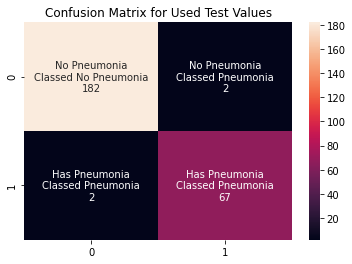

In [5]:
y_cat_preds=((model.predict_classes(X_test)).flatten())
#Create a 1-d array of the predicted classes given by the model 
cf=confusion_matrix(y_test,y_cat_preds)
tn,fp,fn,tp=cf.ravel()
print('Recall',tp/(tp+fn))
print('Sensitivty',tn/(fp+tn))
sns.heatmap(cf,annot=[[f'No Pneumonia\nClassed No Pneumonia\n{tn}',f'No Pneumonia\nClassed Pneumonia\n{fp}'],
                      [f'Has Pneumonia\nClassed Pneumonia\n{fn}',f'Has Pneumonia\nClassed Pneumonia\n{tp}']],fmt="")
plt.title('Confusion Matrix for Used Test Values')
plt.show()

We thus seek an output function with capable of serving as a binary classifier with such a capacity, thus a logistic function was used.  An actual cutoff for certainty-in-prediction would be a delicate matter to do in any kind of way that avoids falling prey to Sorites-like predicaments of "useful enough vs safe enough".  <br>

We chose a cutoff of above 0.95 and below 0.05 for what we would consider to be a sufficiently strong signal to conclude presence or absence of pneumonia, respectively.  It must be stressed that this is a rudimentary assumption picked because it's easy to grasp, of about the right magnitude of accuracy as found in human evaluators, and a commonly used confidence cutoff in general; adding to familiarity.  Such a cutoff would be a necessary component of any of our envisioned uses of our model, however the values given would need to be set with great care and would likely come about following the "dry run" suggested in the conclusion.  

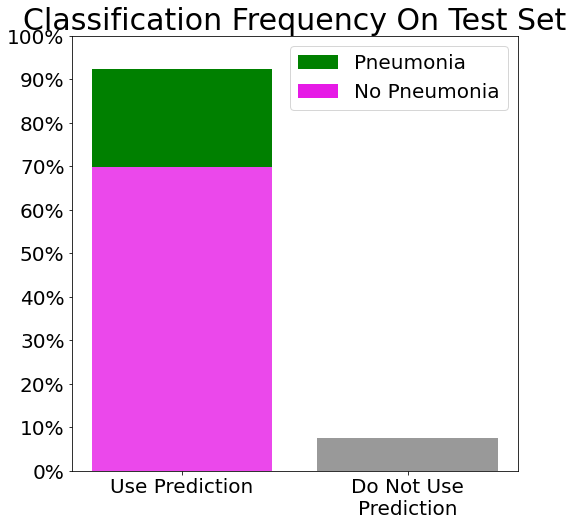

In [36]:
good,nogo,indexer=viz_package.pred_sorter(model,X_test)
#pred_sorter gives us the "useable" data ("good"), the "unuseable data"("bad"), and the associated boolean index for these. 
#Notice the cutoff can be changed by the appropriate parameter supplied to pred_sorter, if one wishes to see the result of
#using values other than .5 and .95

u=plt.figure(figsize=(8,8))
plt.ylim(0,1)
plt.bar([0,1],[((1-good).sum())/(X_test.shape[0]),(nogo.shape[0])/X_test.shape[0]],color=[np.array([.9,.1,.9]),'gray'],alpha=.8);
#Create the bars for "normal" and "unused"
#All values are divided by the total number of values to get a percentage
plt.bar([0],(good.sum())/(X_test.shape[0]),bottom=((1-good).sum())/(X_test.shape[0]),color='g')
#Put the "pneumonia" bar on top of the "normal" bar
plt.xticks([0,1],['Use Prediction','Do Not Use\nPrediction'],fontsize=20);
plt.yticks(np.arange(0,1.1,.1),size=20)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.title('Classification Frequency On Test Set',size=30)
plt.legend([Patch(facecolor='green'),Patch(facecolor=(.9,.1,.9))],['Pneumonia','No Pneumonia'], prop={'size': 20});

Here we can see how our model does classification on the test set.  Of the 253 values examined, 19 will not be considered to be classifiable.  By passing the inverse of the index to `y_test`, it can be seen that there's about a 50/50 split between truly "normal" and truly "pneumonia" x-rays that go unclassified.  Given the roughly 2:1 ratio of "normal" to "pneumonia" patients in the origial test set, this suggests *perhaps* a slight bias towards failing to classify truly-pneumonia patients, but the sizes involved here are small enough and the resulting effects low enough that this is only mentioned as something that's suggestive and could be followed up on, not as anything conclusive.

It should be stressed that we do not here report in any way what was and was not classified correctly (this is given above in the confusion matrix), but rather simply how the model is sorting the data.  We can see a confusion matrix made on the test set, with the ignored values dropped, here:

Recall 0.9827586206896551
Sensitivty 1.0


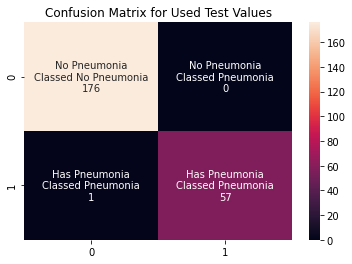

In [33]:
#This is the same code as used in the confusion matrix above, except for the [indexer] masking done on both data arrays
good,nogo,indexer=viz_package.pred_sorter(model,X_test)
y_cat_preds=((model.predict_classes(X_test)).flatten())
#Defined with the same reasoning as in the preceding two code blocks

cf=confusion_matrix(y_test[indexer],y_cat_preds[indexer])
#"indexer" here is used for both for the sake of consistency, recognize that y_cat_preds[indexer] is equivalent to "good"
tn,fp,fn,tp=cf.ravel()
print('Recall',tp/(tp+fn))
print('Sensitivty',tn/(fp+tn))
import seaborn as sns
sns.heatmap(cf,annot=[[f'No Pneumonia\nClassed No Pneumonia\n{tn}',f'No Pneumonia\nClassed Pneumonia\n{fp}'],
                      [f'Has Pneumonia\nClassed Pneumonia\n{fn}',f'Has Pneumonia\nClassed Pneumonia\n{tp}']],fmt="")
plt.title('Confusion Matrix for Used Test Values')
plt.show()

# Conclusion

A convolutional neural network for the identification of pneumonia by examination of x-rays, strictly speaking for those of children in China, was created by iterative improvements of an initial CNN.  Our model did quite well and suggests a viable proof-of-concept for the goals laid out in the introduction of this notebook.  The final model achieved a recall of around 97%, after self-dropping predictions considered to be unreliable by a pre-decided criteria (the intended usage).  Note here the methodological assumption that scores with a higher predicted (in an absolute sense) probability are actually more likely to be correctly classified; this is *certainly* true in general but we are unaware of an underlying theory for plausible, systemic ways that this assumption could be violated.  

Model performance was, if anything, suspiciously high and further refinements to the technique shown here should keep that in mind.  The data size constraints that had to be operated under in the training of this model and its subsequent evaluation may have introduced exploitable patterns that were common to both the training and test sets but would be missing in the population as a whoele.  Further work should seek to expand the data set to include images taken from a source other than the one used; this would also be a convenient time to work in the *full* set of images used in the training of this model.  

Following the same general theme, the extensibility of the model and its future deployment should be considered.  A viable-seeming scheme could be to train an initial model using large, readily available sets-- perhaps just the one used here-- and then to do transfer learning and refinement training on data sets specific to the region or demographics of the populations a given model intends to be deployed to work with, provided data of sufficient size is availabel for those populations.   A model intended for deployment in rural American medical settings, for instance, could have its final levels refined using images from Americans who live in those settings, as well as from comparable populations (perhaps rural Mexicans, for instance).  Deciding where this is appropriate and what represent reasonably equivalent groups would require better domain-specific knowledge; such decisions should be made with the input of the relevant medical experts. 

As an initial deployment towards the aims mentioned in the introduction, we would suggest first performing a dry-run of technology such as this.  Essentially, this would consist of the decision process for the domain in which the model would be deployed being left to perform as usual, while keeping track of the predictions made by the model, with the medical staff being, of course, left unaware of this.  Gathering this real-world, real-time data would then provide an extra level of assurance before deployment is allowed to move forward. 

Further opportunity for research is readily apparent (and indeed may already have been done, see the caveat in the introduction).  A possible, and indeed plausible, limitation of this process is that the images used were traditional x-rays, which were therefore taken by traditional means for traditional (human) analysis.  Taking optimal x-ray images for a given diagnostic role is heavily stressed by the [IAEA](https://www.iaea.org/resources/rpop/health-professionals/radiology/radiography/optimization), it seems plausible to suspect that the optimal configurations could be adjusted were responsibility able to be shifted to machines.  Again though this would require careful analysis prior to implementation, as one would wish to avoid running two sets of x-rays (one for a human and one for a machine).  Analysis of this could help inform the selection of the correct "unuseability" criteria deliberated above.  

Another potential avenue to explore as an application of the technique shown here is in minimizing x-ray images that must be redone. It is recommended by the [FDA](https://www.fda.gov/radiation-emitting-products/medical-imaging/medical-x-ray-imaging) that x-ray images which are considered to be below interpretable quality nevertheless be saved for meta-analysis, and the IAEA gives recommendations for how some useable analysis can still be obtained from x-ray images that seem on first blush to be wholly unuseable.  Further research may suggest that it is at least **plausible** that machine-oriented techniques could be used to successfully analyze images that have aberrancies which prevent human analysis.  